# Fig1.X : Deconvolution Macaque organoids

### Author : Eulalie Liorzou

In [1]:
# Load libraries
library(DWLS)
library(dplyr)
library(data.table)
library(pheatmap)
library(ggplotify)
library(purrr)
library(ggpubr)
library(MatrixGenerics)
library(ggh4x)
library(RColorBrewer)
library(stringr)
library(Seurat)
library(edgeR) # v3.38.4
library(pheatmap)
library(data.table)
library(dplyr)
library(tidyverse)
library(ggalluvial)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘purrr’


The following object is masked from ‘package:data.table’:

    transpose


Loading required package: ggplot2

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges,

## Macaque organoids deconvolution


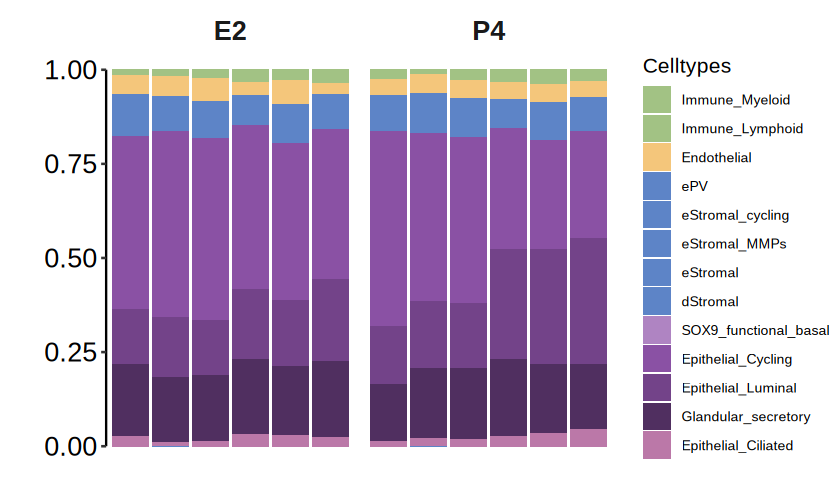

In [43]:
options(repr.plot.width=7, repr.plot.height=4)

species = "Macaque"
## Loading the result of the deconvolution analysis
DWLS_long = fread(input =  paste0("../../../results/snRNA-seq/DWLS_",species,"/DWLS_", species, "Organoids_deconvolution_with_Humansn.tsv"), sep = "\t")

## Order by % of cell types / and by Epithelial VS other celltypes
celltype_order = rev(c('Epithelial_Ciliated','Glandular_secretory','Epithelial_Luminal','Epithelial_Cycling','SOX9_functional_basal','dStromal','eStromal','eStromal_MMPs','eStromal_cycling','ePV','Endothelial','Immune_Lymphoid','Immune_Myeloid'))
DWLS_long$Celltypes = factor(DWLS_long$Celltypes, levels= celltype_order)

## Create a color vector 

# # EVOMENS COLORS
# colors_subcelltypes = c("eStromal" = "#F38131", 
#   "Glandular_secretory" = "#326AC3", 
#   "SOX9_functional_basal" ="#084594",  
#   "Immune_Lymphoid" ="#238b45", 
#   "Immune_Myeloid" = "#74c476", 
#   "eStromal_cycling" = "#BC9158", 
#   "Epithelial_Cycling" = "#5429A3", 
#   "eStromal_MMPs" = "#F5994F", 
#   "Epithelial_Luminal" = "#608CD3",
#   "Endothelial" = "#FF99BB", 
#   "dStromal" = "#F9C98A", 
#   "ePV" = "#FFC2D6", 
#   "Epithelial_Ciliated" = "#8DAEE2")

# colors_subcelltypes = c("Glandular_secretory" = "#502F60",
#                         "SOX9_functional_basal" ="#AF84C2",
#                          "Epithelial_Cycling" = "#8A51A4",
#                          "Epithelial_Luminal" = "#734389",
#                          "Epithelial_Ciliated" = "#BB78A8",
#                          "eStromal" = "#F4C67B",  
#                          "eStromal_cycling" = "#F4C67B", 
#                          "eStromal_MMPs" = "#F4C67B", 
#                          "dStromal" = "#F4C67B", 
#                          "ePV" = "#F4C67B", 
#                          "Endothelial" = "#5D84C7", 
#                          "Immune_Lymphoid" ="#A2C284", 
#                          "Immune_Myeloid" = "#A2C284"
#                      )

colors_subcelltypes = c("Glandular_secretory" = "#502F60",
                        "SOX9_functional_basal" ="#AF84C2",
                         "Epithelial_Cycling" = "#8A51A4",
                         "Epithelial_Luminal" = "#734389",
                         "Epithelial_Ciliated" = "#BB78A8",
                         "eStromal" = "#5D84C7",  
                         "eStromal_cycling" = "#5D84C7", 
                         "eStromal_MMPs" = "#5D84C7", 
                         "dStromal" = "#5D84C7", 
                         "ePV" = "#5D84C7", 
                         "Endothelial" = "#F4C67B", 
                         "Immune_Lymphoid" ="#A2C284", 
                         "Immune_Myeloid" = "#A2C284"
                     )


## Plot barplor
ggplot(DWLS_long, aes(x =LongName , y = Estimated_celltype_fraction, fill = Celltypes)) +
    geom_bar(position="stack", stat="identity") +
    labs(y="", x="") + 
    theme_classic(base_size = 12) + theme(axis.text.x = element_text(angle = 90)) +
#     ggtitle("Macaque organoids : deconvolution  (DWLS)") +
    scale_fill_manual(values = colors_subcelltypes) +
    facet_grid(~Hormone, scales = "free", space = "free", ) +
theme_pubr() + 
guides(x = "axis_truncated", y = "axis_truncated") +
  theme( 
        strip.background = element_blank(),
        axis.line.x = element_blank(),
        legend.text =element_text(size = 8) ,
        strip.text = element_text(size = 16,face = "bold"), 
        axis.title.y = element_text(face = "bold", size = 20),
        axis.title.x = element_blank(),
        axis.text.y = element_text(size = 16, hjust = 1),
        axis.text.x = element_text(size = 8, hjust = 1, angle=40),
        plot.title = element_text(face = "bold", size = 20),
        legend.position = "right", 
        axis.line.y = element_line(),
       ) +
    theme(axis.text = element_text(size = 15), axis.text.x = element_blank(), axis.ticks.x = element_blank())

ggsave(filename = paste0("../../../figures/pieces/Deconvolution_",species,"_wtHumansn.pdf"), device = "pdf", width = 7, height = 4)

## Mouse organoids deconvolution 

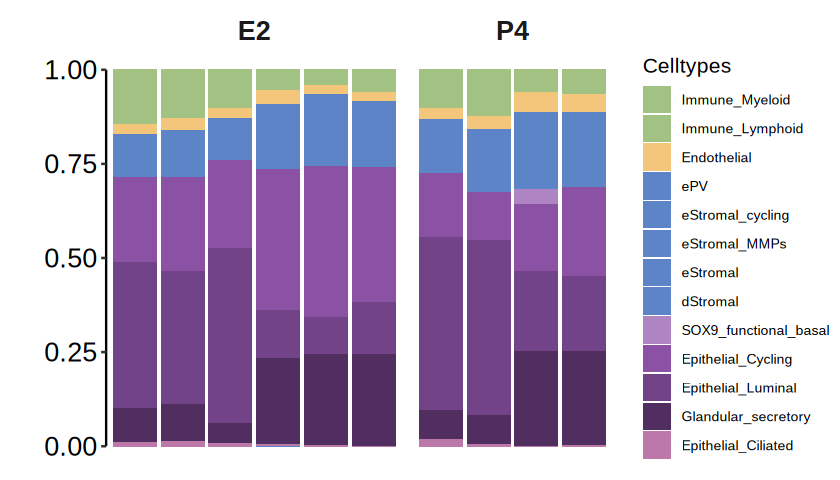

In [44]:
options(repr.plot.width=7, repr.plot.height=4)

species = "Mouse"
## Loading the result of the deconvolution analysis
DWLS_long = fread(input =  paste0("../../../results/snRNA-seq/DWLS_",species,"/DWLS_", species, "Organoids_deconvolution_with_Humansn.tsv"), sep = "\t")

## Order by % of cell types / and by Epithelial VS other celltypes
celltype_order = rev(c('Epithelial_Ciliated','Glandular_secretory','Epithelial_Luminal','Epithelial_Cycling','SOX9_functional_basal','dStromal','eStromal','eStromal_MMPs','eStromal_cycling','ePV','Endothelial','Immune_Lymphoid','Immune_Myeloid'))
DWLS_long$Celltypes = factor(DWLS_long$Celltypes, levels= celltype_order)

## Create a color vector 

# # EVOMENS COLORS
# colors_subcelltypes = c("eStromal" = "#F38131", 
#   "Glandular_secretory" = "#326AC3", 
#   "SOX9_functional_basal" ="#084594",  
#   "Immune_Lymphoid" ="#238b45", 
#   "Immune_Myeloid" = "#74c476", 
#   "eStromal_cycling" = "#BC9158", 
#   "Epithelial_Cycling" = "#5429A3", 
#   "eStromal_MMPs" = "#F5994F", 
#   "Epithelial_Luminal" = "#608CD3",
#   "Endothelial" = "#FF99BB", 
#   "dStromal" = "#F9C98A", 
#   "ePV" = "#FFC2D6", 
#   "Epithelial_Ciliated" = "#8DAEE2")

# colors_subcelltypes = c("Glandular_secretory" = "#502F60",
#                         "SOX9_functional_basal" ="#AF84C2",
#                          "Epithelial_Cycling" = "#8A51A4",
#                          "Epithelial_Luminal" = "#734389",
#                          "Epithelial_Ciliated" = "#BB78A8",
#                          "eStromal" = "#F4C67B",  
#                          "eStromal_cycling" = "#F4C67B", 
#                          "eStromal_MMPs" = "#F4C67B", 
#                          "dStromal" = "#F4C67B", 
#                          "ePV" = "#F4C67B", 
#                          "Endothelial" = "#5D84C7", 
#                          "Immune_Lymphoid" ="#A2C284", 
#                          "Immune_Myeloid" = "#A2C284"
#                      )

colors_subcelltypes = c("Glandular_secretory" = "#502F60",
                        "SOX9_functional_basal" ="#AF84C2",
                         "Epithelial_Cycling" = "#8A51A4",
                         "Epithelial_Luminal" = "#734389",
                         "Epithelial_Ciliated" = "#BB78A8",
                         "eStromal" = "#5D84C7",  
                         "eStromal_cycling" = "#5D84C7", 
                         "eStromal_MMPs" = "#5D84C7", 
                         "dStromal" = "#5D84C7", 
                         "ePV" = "#5D84C7", 
                         "Endothelial" = "#F4C67B", 
                         "Immune_Lymphoid" ="#A2C284", 
                         "Immune_Myeloid" = "#A2C284"
                     )


## Plot barplor
ggplot(DWLS_long, aes(x =LongName , y = Estimated_celltype_fraction, fill = Celltypes)) +
    geom_bar(position="stack", stat="identity") +
    labs(y="", x="") + 
    theme_classic(base_size = 12) + theme(axis.text.x = element_text(angle = 90)) +
#     ggtitle("Macaque organoids : deconvolution  (DWLS)") +
    scale_fill_manual(values = colors_subcelltypes) +
    facet_grid(~Hormone, scales = "free", space = "free") +
theme_pubr() + 
guides(x = "axis_truncated", y = "axis_truncated") +
  theme( 
        strip.background = element_blank(),
        axis.line.x = element_blank(),
        legend.text =element_text(size = 8) ,
        strip.text = element_text(size = 16,face = "bold"), 
        axis.title.y = element_text(face = "bold", size = 20),
        axis.title.x = element_blank(),
        axis.text.y = element_text(size = 16, hjust = 1),
        axis.text.x = element_text(size = 8, hjust = 1, angle=40),
        plot.title = element_text(face = "bold", size = 20),
        legend.position = "right", 
        axis.line.y = element_line(),
       ) +
    theme(axis.text = element_text(size = 15), axis.text.x = element_blank(), axis.ticks.x = element_blank())

ggsave(filename = paste0("../../../figures/pieces/Deconvolution_",species,"_wtHumansn.pdf"), device = "pdf", width = 7, height = 4)